In [58]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from itertools import chain

In [59]:
# Create pandas dataframe from csv
df = pd.read_csv("../program/log/MainLogWithTarjan.csv", sep=",", header=0)

# Filter
df = df[df['verified'] == True]
df = df[df['millis'] < 30000]

# Mean
mean = df.groupby('k').mean()

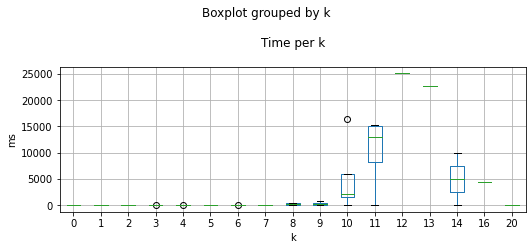

In [60]:
df.boxplot(column='millis', by='k')
plt.xlabel('k')
plt.ylabel('ms')
plt.title('Time per k', y=1.1)
plt.savefig('plots/TimeBoxPlotWithTarjan.png',  bbox_inches='tight')

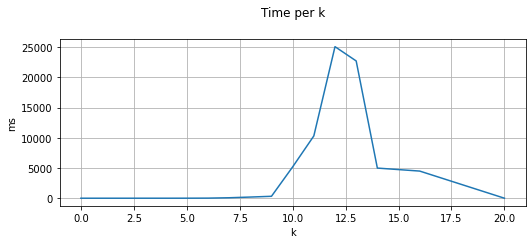

In [61]:
plt.plot(mean.index, mean['millis'])
plt.xlabel('k')
plt.ylabel('ms')
plt.title('Time per k', y=1.1)
plt.grid()
plt.savefig('plots/TimePlot.png',  bbox_inches='tight')
plt.show()